In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
#create path
path = r'C:\Users\Mathilde\Documents\DATA ANALYSIS CAREERFOUNDRY\May 2024 - Instacart Basket Analysis'
#orders product customers combined data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ords_prods_customers.pkl'))

# 2. Create Charts

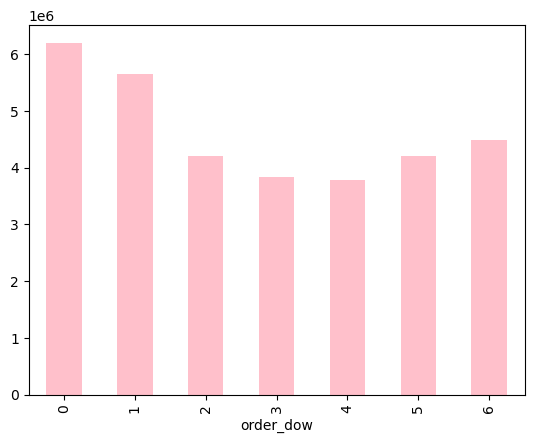

In [45]:
# create a bar chart - count of products bought each day of the week
bar_chart_frequency_dow = df['order_dow'].value_counts().sort_index().plot.bar(color = 'pink')

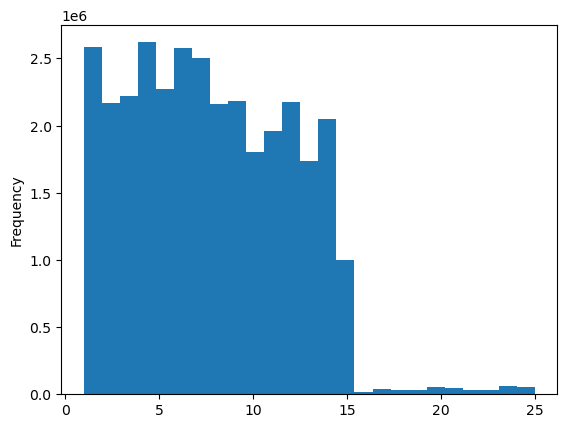

In [6]:
# Create histogram of prices
hist = df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

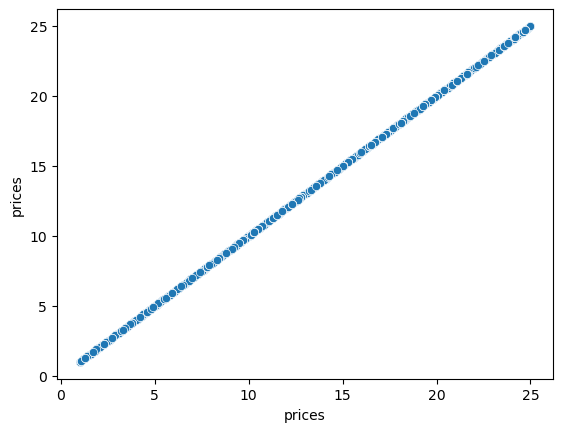

In [8]:
# Create scatter plot
sns.scatterplot(x = 'prices', y = 'prices', data = df)

Observation: as I already removed the outliers in a previous task, we're not spotting anything interesting in this visualization (not like in the exercise)

# Sampling data

In [11]:
# Set seed + assign it - create list holding true/false values to the test np.random.rand()<=0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [12]:
# Store 30% of the df into sample
sample = df[~dev]

In [13]:
# Reducing the sample further keeping only the useful columns
df_2 = sample[['order_dow','prices']]

# Create line plot from the sample

C:\Users\Mathilde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mathilde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


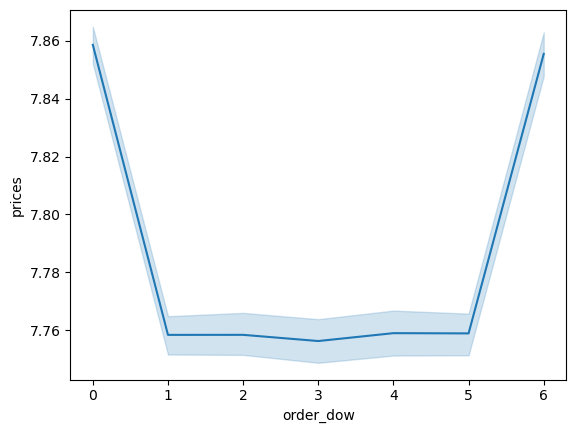

In [14]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

# 3. Histogram hour of day

In [23]:
# Checking name of column I need
pd.options.display.max_columns = None
df.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,State,Age,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both


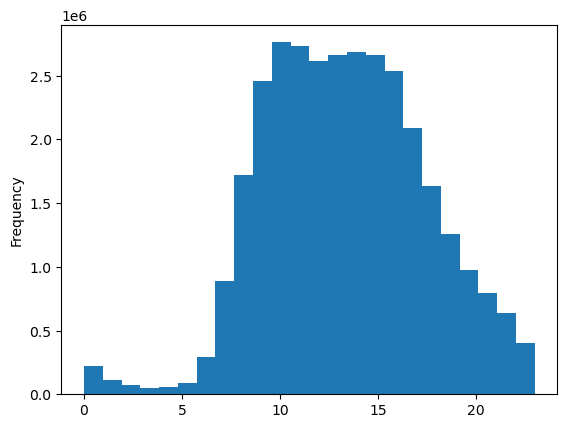

In [17]:
hist2 = df['order_hour_of_day'].plot.hist(bins = 24)

# Obervations:

Most orders are placed during the day, and not at night (it was to be expected). The numbers of orders go increasingly from 7am until 10 am - Then, there is a "plateau", where the number of orders stays almost constant around the maximum, from 10am until 5pm. And from 5pm, the number of orders decreases steadily.

Note : What the histogram shows is not actually the number of orders, but the number of products placed in the orders placed at each hour (which must be strongly correlated) - I think it would have been faster, requiering less computing power, to make this histogram from the data from the orders data set, uncombined.

In [19]:
# Frequency table, that shows the precise numerical values of the histogram.
df['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: count, dtype: int64

# 4. Loyalty bar chart

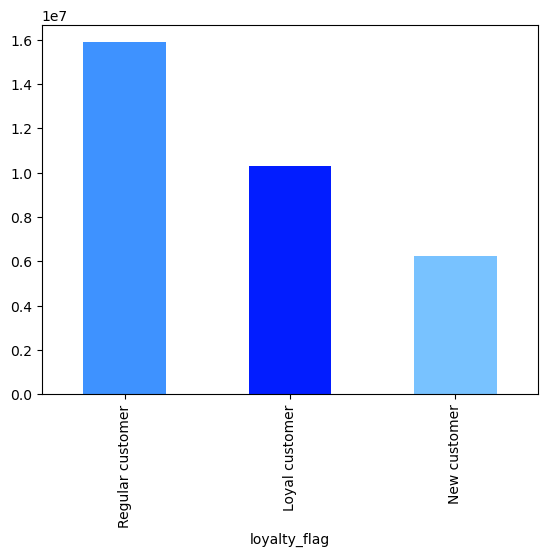

In [46]:
loyalty_barchart = df['loyalty_flag'].value_counts().plot.bar(color = ['#3E92FF', '#021DFF', '#78C2FF'])

# 5. Priced in function of the hour of the day

For this line chart, I need to use a representative sample, as my computer doesn't have enough RAM to process the whole data set. I will simply reuse the sample created earlier, that I named "sample". I cannot use df_2, as it doesn't contain the column "order_hour_of_day": let's create a data frame that does.

In [32]:
df_3 = sample[['prices', 'order_hour_of_day']]

In [33]:
df_3.head(5)

,prices,order_hour_of_day
0,9.0,8
2,4.4,8
3,4.7,8
6,3.0,7
10,4.0,7


C:\Users\Mathilde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mathilde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


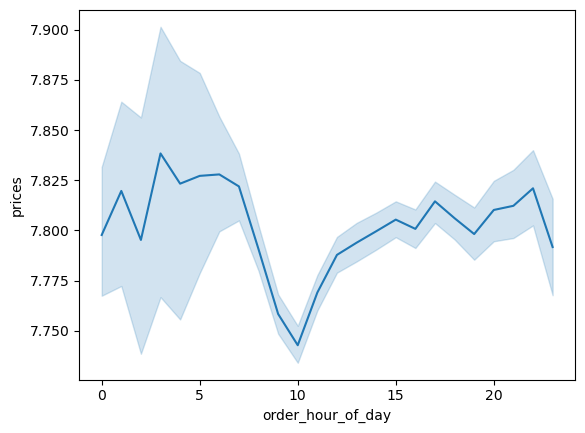

In [48]:
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

### Observations:

At first glance, it seems like there are big variations in the prices over the day, with a drop at the peak hour of 10am: but if we look closely at the values on the y axis, we see that the prices vary from about 7.73 to about 7.83, which is not very significant.

# Exploratory analysis: customers demographics

## 6. Connexion between age and family situation

Note 1 : I'll need a sample again, for the whole data set is too big - and I am not satusfied using the merged data set. It shows each customer as many times as the total number of products they bought at Instacart, which is not what we want for this analysis. Loyal customers are over represented compared with new customers. I'm going to import the original customers data set. In the previous task, I didn't find any duplicates, missing values or mixed-types columns: it is good to be used as it is. It is also much smaller tha the combinet data set: it will to perfectly for the chart I want to make.

Note 2: The guideline in the task says "Line chart": however, "fam_status" being a categorical variable, I don't see how to make a line chart with it. I cent for a scatter plot instead.

In [36]:
#new data set - customer data
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'customers.csv'), index_col = False)

In [40]:
# Changing columns names
customers.rename(columns = {'Surnam' : 'Last Name'}, inplace = True)
customers.rename(columns = {'STATE' : 'State'}, inplace = True)

In [41]:
customers.head(5)

,user_id,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


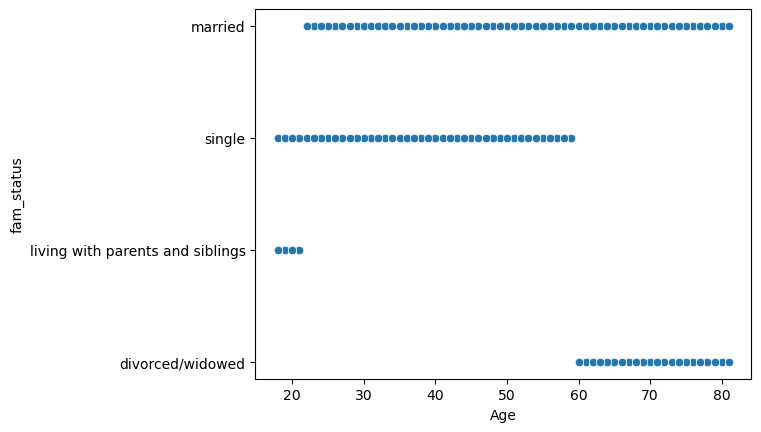

In [49]:
# Create a scatter plot that shows relationship between age and family status
scatterplot = sns.scatterplot(x = 'Age', y = 'fam_status', data = customers)

### Observations:

The result is pretty much what we could have expected. Only younger customers (18 to 22, approx.) live with parents sand sibling. Only older customers (60+) are divorced/widowed, a life situation that can hardly happen early in one's life. There's a big overlap between "single" and "married", even though single customers tend to be younger than the married ones (which also makes sense)

## 7. Connection between age and income

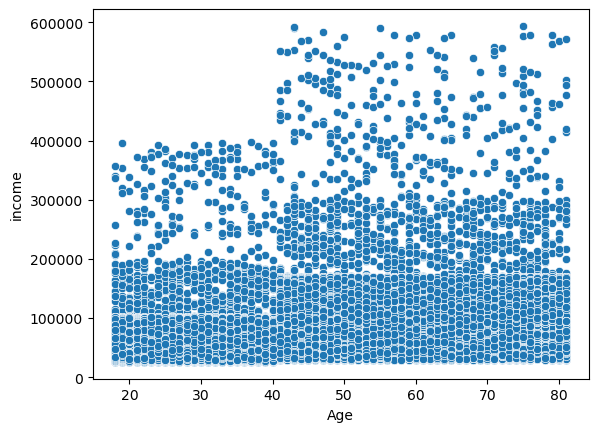

In [50]:
scatterplot2 = sns.scatterplot(x = 'Age', y = 'income', data = customers)

### Observations:

Low income (0 to 200k) is the most common, and it it not specific to any age group. Higher income (400k +) is however specific to customers over 40 years old. There is a clear delimitation: customers between 18 and 40 earn between 0 and 400k. Customers between 41 and 81 earn between 0 and 600k.

# 8. Export charts

In [52]:
bar_chart_frequency_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_frequency_dow.png'))
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours_of_day.png'))
loyalty_barchart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_barchart.png'))
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_over_time_of_the_day.png'))
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot_age_fam_stat.png'))
scatterplot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot_age_income.png'))